In [2]:
import networkx as nx
import random as rd
opts = {"with_labels": True, "node_color":'g'}

In [117]:
#Funcion para seleccionar los nodos que se reconectan, a partir de nkp
'''
def set_nodes_to_reconnect(n,k,p):
    nodes = []
    for i in range(0,round(n*k*p)):
        while len(nodes) < round(n*k*p):
            node = rd.randint(0,n-1)
            if not node in nodes: 
                nodes.append(node)
    print("Los nodos que se van a recablear son:", nodes)
    return nodes


#Funcion para conectar los nodos
def connect_nodes(G,nodes):
    nodes_receivers = []
    while len(nodes_receivers) < len(nodes):
        for sender in nodes:
            receiver = rd.randint(0,len(G)-1)
            if sender != receiver and not G.has_edge(sender, receiver):
                G.remove_edge(sender, (sender+1)%len(G))
                G.add_edge(sender, receiver)
                nodes_receivers.append(receiver)
    print("Los nodos que reciben la conexion son", nodes_receivers)
    return G,nodes_receivers


#Funcion para obtener los vecinos de los nodos
def get_neighbors(G, nodes):
    neighbors = []
    for node in nodes:
        for node_G in G:
            if G.has_edge(node,node_G):
                neighbors.append(node_G)
    return neighbors

'''
#Inicia una red conectando cada nodo a sus 2k vecinos
def create_SW_network(n, k,p):
    if k > 0.16*n:
        raise Exception("k debe ser <= que el 16% de n")
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, k+1): #decide hasta que nodo se va a conectar
            G.add_edge(v, (v+o) % n)#crea la conexion
    print("El numero de conexiones de largo alcance a recablear son:",round(n*k*p))
    for node in G:
        for connection in range(1,k+1):
            if rd.random() < p:
                receiver_node = rd.randint(0,n-1)
                if receiver_node != node and not G.has_edge(receiver_node, node):
                    G.remove_edge(node, (node+connection)%n)
                    G.add_edge(node,receiver_node)
    '''
    nodes = set_nodes_to_reconnect(n,k,p)
    
    G,nodes_receiver = connect_nodes(G, nodes)
    
    sender_neighbors = get_neighbors(G,nodes)
    receiver_neighbors = get_neighbors(G,nodes_receiver)
    print("Sender neighbors",sender_neighbors)
    print("Receivers neighbors",receiver_neighbors)
    '''
    return G


El numero de conexiones de largo alcance a recablear son: 32


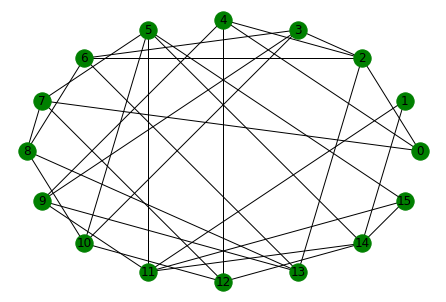

In [126]:
G = create_SW_network(16,2,1)
nx.draw_circular(G,**opts)